# Decoupled weight decay regularization
---


## Abstract
---
* L2 regularization(L2 정규화)와 weight decay(가중치 감쇠)는 Stochastic Gradient Desent(SGD)에 대해 동등하지만, Adam과 같은 적응형 경사 하강 알고리즘에 대해서는 성립하지 않음.
* Decoupling weight decay방법을 통해 Adam의 성능을 향상시킴.

## Adam
---
* 각 매개변수에 대한 가변 학습률을 적용함.
    *  모멘텀효과 + weigt마다 다른 learning rate를 적용하는 adapative learning rate를 적용.
* RMSprop + Momentum
* 기존의 방향과 얼마나 갈지도 정해줌.
    

## L2 regularziation
---
* overfitting을 방지하기 위해 가중치를 규제하는 방법중 하나.
* 가중치 규제(Weight Regularization)하는 방법
    * L1 regularization, L2 regularization 

* Regularization은 overfitting을 방지하지 않도록 손실함수에 특정한 규제 함수를 더해 손실 함수가 너무 작아지지 않도록 weight에 패널티를 주는 방법.  
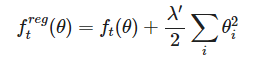
* L2 Regularziation은 기존 Cost Fucntion에 가중치 제곱의 합을 더하는 형태.
* weight의 크기에 따라 weight 값이 큰 값을 더 빠르게 감소시키는 weight decay 기법.
* weight의 크기에 따라 weight의 regularization의 정도가 달라져 학습 효과가 L1 대비 더 좋게 나타납니다.


## Weight Decay
---
* Gradient descent에서 weight를 업데이트를 할 때, 이전의 weight의 일정 비율을 감소시켜 overfitting을 방지하는 기술.  
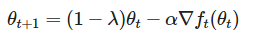
* 람다는 decay rate으로 0~1사이의 값을가짐.
* weight가 비약적으로 커지는 것을 방지할 수 있음.

## Motivation
---
* AdaGrad, RMSPrp, Adam, AMSGrad와 같은 방법이 훈련시킬때 기본적으로 선택이됨.
* 하지만, CIFAR-10과 CIFAR-100 Krizhevsky의 데이터 셋에서 가장 좋은 결과는 SGD와 모멘텀을 적용해서 이루어짐.
* 또한, 딥러닝 학습시 Adam보다 SGD가 일반화가 더 잘됨.
    * 일반화 : 학습데이터와 Input Data가 달라져도 성능 차이가 나지 않게 하는 것을 일반화.
    
* __Adam이 SGD with momentum보다 낮은 일반화를 보여주는 결과에서도 경쟁력을 갖도록 하는 것.__

## Problem
---
* __L2 regularization과 Weight Decay는 동일하지 않다.__
    * SGD에서는 L2 regularization과 weight decay가 같을 수 있지만, Adam의 경우 L2 정규화를 사용하게 되면, 덜 정규화되도록 한다.
* __L2 regularization은 Adam에서 효과적이지 않다.__
    * Adam이 일반적인 딥러닝 라이브러리에서는 L2정규화만 구현되고 weight decya는 구현되지 않았을 수 있다.
* __Weight Decay는 SGD와 Adam에서 모두 효과적이다.__
* __최적의 Weight Decay는 배치의 passes와 가중치 업데이트의 총 수에 따라 달라짐.__
* __Adam은 스케쥴링된 learning rate 배수를 통해 이점을 얻을 수 있다.__


## Evidence
---
### SGD - L2 정규화
* L2 정규화를 사용한 경우의 식  
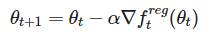
* L2 정규화가 포함된 손실함수 편미분 결과.  
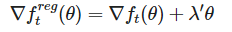
* 위 식에 다시 대입  
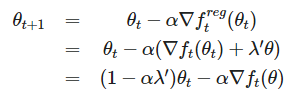

### SGD - Weight Decay  
* Weight Decay를 포함한 식.  
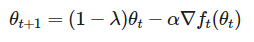


* learning rate와 weight decay factor는 서로 dependent함.
* 최적의 learning rate를 찾아도 weight dacay factor(람다)가 달라지면 learning rate를 다시 찾아야함.  
* __weight decay factor와 learing rate를 independent하게 해야함.__

### Adam - L2 정규화
* Adam의 기본 parameter 식.  
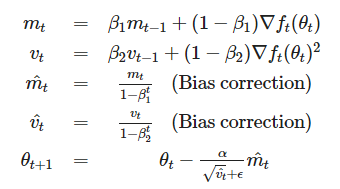
* L2 정규화를 사용한 식.    
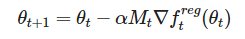
* 앞서구한 편미분 손실함수를 대입.  
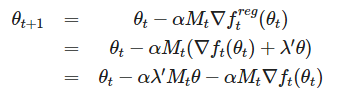
### Adam - Weight Decay
* weight decay만 적용한 weight 업데이트 식  
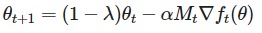

* 더 적은 decay rate로 weight decay 역활을 하므로 일반화 능력이 저하됨.

## Method
---
* 해결방법으로 SGD와 adam에 L2 정규화 대신 weight decay 방법을 사용.  
    * 논문에선 L2 정규화보다 weight decay가 더 좋다고 함  
    [참고](https://arxiv.org/abs/1807.07540).
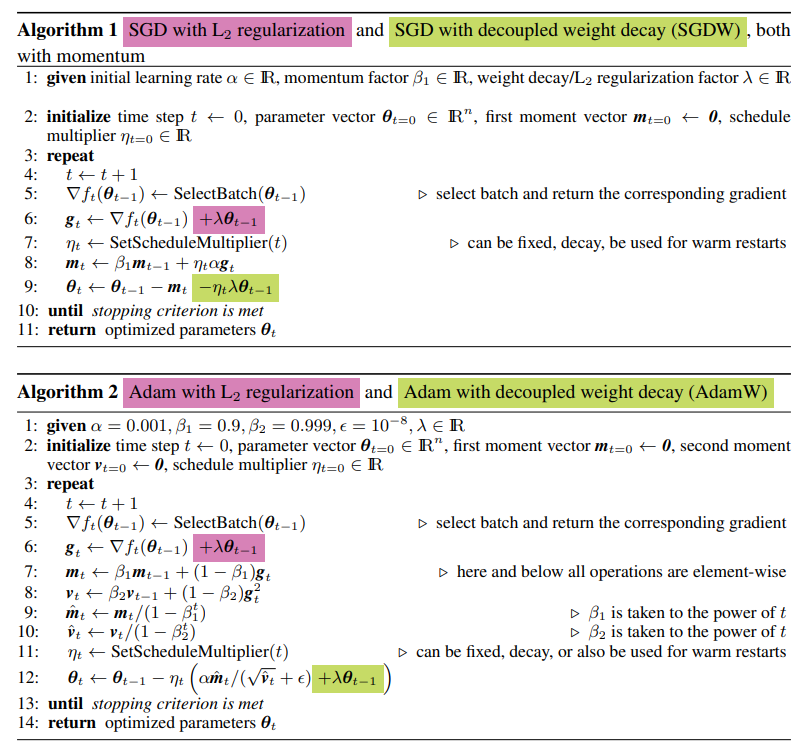

## Results
---
* 기존의 Adam과 AdamW 비교  
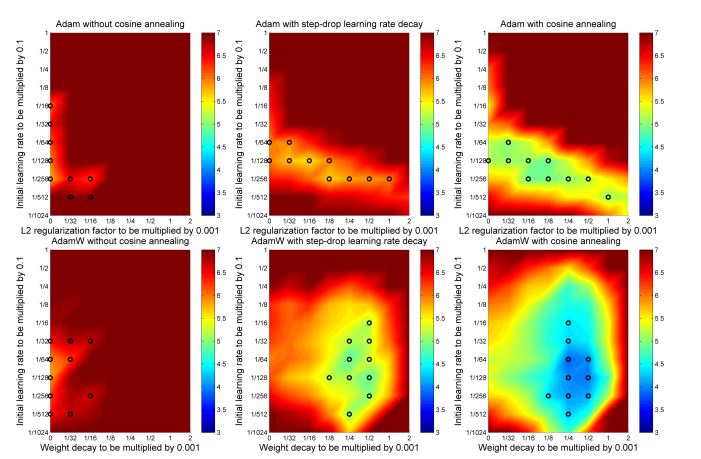  
* 결과
    * Adam에서 적절한 learning rate schedule을 사용하면 성능이 좋다는 것을 볼수 있다.
        * 특히 cosine annealing이 좋음.
    * AdamW  > Adam
    
    
* SGD, SGDW, Adam, AdamW 비교  
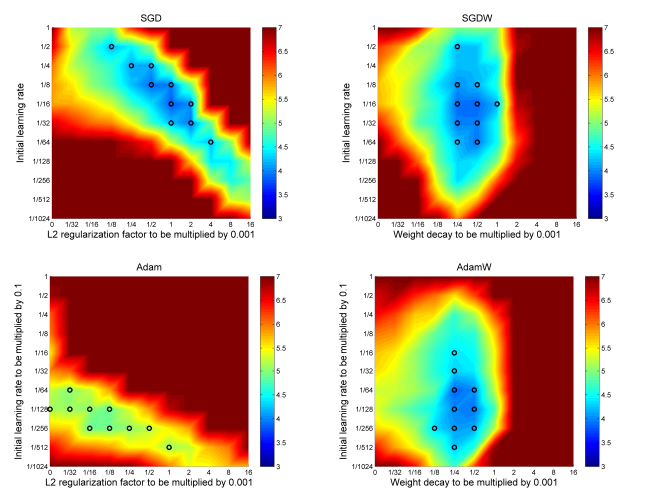  

* 결과
    * SGD의 경우 대각선으로 분포되는것은 weight decay가 learning rate와 dependent하다는 것을 볼 수 있다.
        * SGDW의 경우 그렇지 않음.
    * Adam은 SGD, SGDW한테 둘다 밀림.
    

* Adam과 AdamW 딥러닝 학습 관련 Loss, test error  
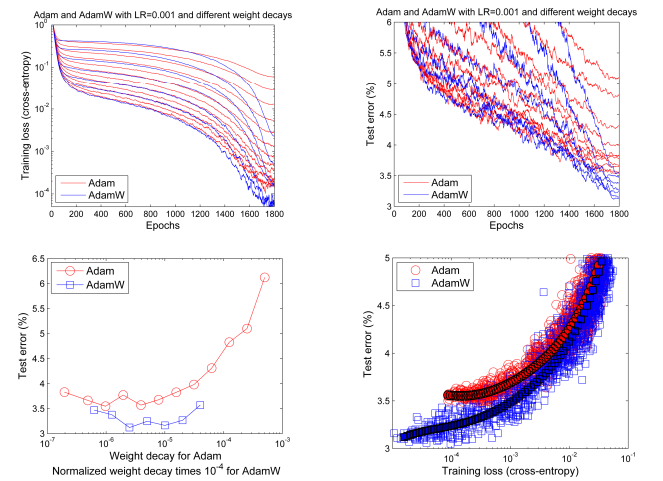

## Improvement
---
* 차후 발전 가능성.  
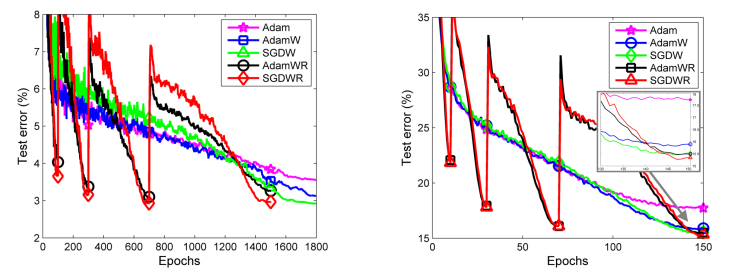

### Step-drop learning rate decay
* 계단을 내려가듯이 학습이 진행됨에 따라 Learning rate가 줄어드는 방법


### linearly decreasing learning rate decay
* 선을 타고 내려가듯이 학습이 진행됨에 따라 learning rate가 줄어드는 방법.
  
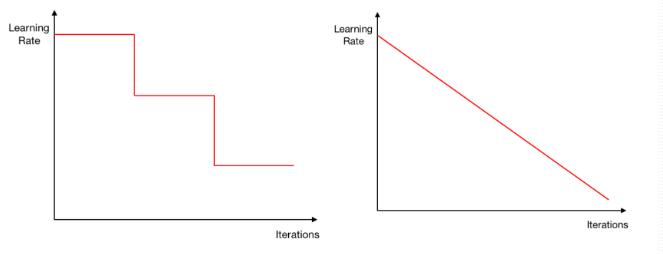
### cosine annealing
* 초기 학습시 빠르게 수렴 지점에 도달하기 위해 천천히 떨어지고 마지막에는 수렴지점에 정밀하게 다가가는 방법.  
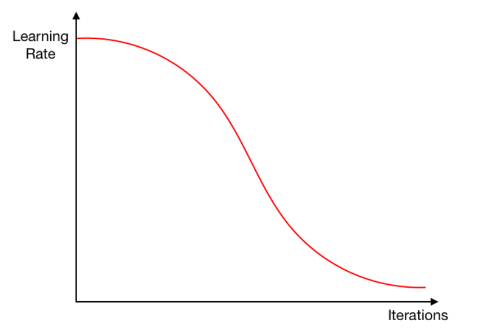


### Warm restart
* 학습 중간 중간에 learning rate를 증가 시켜 local mimimum에서 빠져나올 수 있도록 하는 방법.  
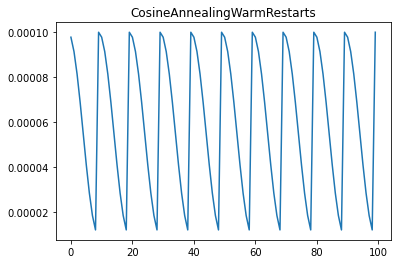

## Reference
[참고](https://towardsdatascience.com/https-medium-com-reina-wang-tw-stochastic-gradient-descent-with-restarts-5f511975163)
[참고2](https://arxiv.org/pdf/1711.05101.pdf)